## Imports

In [55]:
import time

import numpy as np
import cv2 as cv
import os
import glob
import matplotlib.pyplot as plt
from numpy.random import uniform
import pdb
from tqdm import tqdm



## Show functions

In [32]:
def show_image_cv(title,image,fx=0.2,fy=0.2,output = True):

    if not output:
        return

    image = cv.resize(image,(0,0),fx=fx,fy=fy)
    cv.imshow(title, image)
    cv.waitKey(0)
    cv.destroyAllWindows()

def show_image_matplot(title, image,output = True):
    if not output:
        return

    image_resized = cv.resize(image, (0, 0), fx=0.3, fy=0.3)

    image = cv.cvtColor(image_resized, cv.COLOR_BGR2RGB)

    plt.imshow(image)
    plt.title(title)
    plt.axis('off')  # Ascunde axele pentru a afișa doar imaginea
    plt.show()

## Directory and files functions

In [3]:
def get_image_paths(dir,index):
    image_paths = os.listdir(dir)
    image_paths = ["./" + dir + "/" + file for file in image_paths if file[0:2] == str(index) + "_" and file[-4:] == ".jpg"]
    return sorted(image_paths)


In [18]:
img = cv.imread("antrenare/1_01.jpg")
show_image_cv("test",img)

## HSV masking

In [29]:
# hsv mask

def get_outer_masked_image(img,output = False):
    lower_hsv_bound = np.array([20,0,0])
    upper_hsv_bound = np.array([255,255,255])
    hsv_image = cv.cvtColor(img, cv.COLOR_BGR2HSV)

    mask = cv.inRange(hsv_image, lower_hsv_bound, upper_hsv_bound)
    show_image_cv("mask",mask,output = output)

    new_image = cv.bitwise_and(img, img, mask=mask)
    show_image_cv("ceva",new_image,output = output)

    return new_image



## Get contours function

In [45]:
def get_countours(image,output = False):

    masked_image = get_outer_masked_image(image)
    masked_image_grey = cv.cvtColor(masked_image, cv.COLOR_BGR2GRAY)

    show_image_cv("masked_image_grey",masked_image_grey,output = output)

    masked_image_grey = cv.medianBlur(masked_image_grey,3)
    show_image_cv('median_blur_image',masked_image_grey,output = output)

    contours, _ = cv.findContours(masked_image_grey,  cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

    max_area = 0
    for i in range(len(contours)):
            if(len(contours[i]) >3):
                possible_top_left = None
                possible_bottom_right = None
                for point in contours[i].squeeze():
                    if possible_top_left is None or point[0] + point[1] < possible_top_left[0] + possible_top_left[1]:
                        possible_top_left = point

                    if possible_bottom_right is None or point[0] + point[1] > possible_bottom_right[0] + possible_bottom_right[1] :
                        possible_bottom_right = point

                diff = np.diff(contours[i].squeeze(), axis = 1)
                possible_top_right = contours[i].squeeze()[np.argmin(diff)]
                possible_bottom_left = contours[i].squeeze()[np.argmax(diff)]
                if cv.contourArea(np.array([[possible_top_left],[possible_top_right],[possible_bottom_right],[possible_bottom_left]])) > max_area:
                    max_area = cv.contourArea(np.array([[possible_top_left],[possible_top_right],[possible_bottom_right],[possible_bottom_left]]))
                    top_left = possible_top_left
                    bottom_right = possible_bottom_right
                    top_right = possible_top_right
                    bottom_left = possible_bottom_left

    width = 810
    height = 810

    image_copy = cv.cvtColor(masked_image_grey.copy(),cv.COLOR_GRAY2BGR)
    cv.circle(image_copy,tuple(top_left),20,(0,0,255),-1)
    cv.circle(image_copy,tuple(top_right),20,(0,0,255),-1)
    cv.circle(image_copy,tuple(bottom_left),20,(0,0,255),-1)
    cv.circle(image_copy,tuple(bottom_right),20,(0,0,255),-1)
    show_image_cv("detected corners",image_copy,output = output)

    img_grey = cv.cvtColor(image.copy(),cv.COLOR_BGR2GRAY)

    puzzle = np.array([top_left,top_right,bottom_left,bottom_right],dtype=np.float32)
    destination = np.array([[0,0],[width,0],[0,height],[width,height]],dtype=np.float32)
    M = cv.getPerspectiveTransform(puzzle,destination)
    result = cv.warpPerspective(img_grey,M,(width,height))
    result = cv.cvtColor(result,cv.COLOR_GRAY2BGR)

    return result

In [46]:
img2 = cv.imread("antrenare/1_30.jpg")
result = get_countours(img2,output = True)

In [47]:
show_image_cv("result",result,fx=1,fy=1)

In [ ]:
def extract_game(image_paths,size = 1000):
    images = []
    size = size if size <= len(image_paths) else len(image_paths)

    for i in tqdm(range(size)):
        img = cv.imread(image_paths[i])
        result = get_countours(img)
        images.append(result)

    return np.array(images)

images = extract_game(get_image_paths("antrenare",2))


 64%|██████▍   | 32/50 [00:08<00:04,  3.70it/s]

['./antrenare/1_01.jpg', './antrenare/1_02.jpg', './antrenare/1_03.jpg', './antrenare/1_04.jpg', './antrenare/1_05.jpg', './antrenare/1_06.jpg', './antrenare/1_07.jpg', './antrenare/1_08.jpg', './antrenare/1_09.jpg', './antrenare/1_10.jpg', './antrenare/1_11.jpg', './antrenare/1_12.jpg', './antrenare/1_13.jpg', './antrenare/1_14.jpg', './antrenare/1_15.jpg', './antrenare/1_16.jpg', './antrenare/1_17.jpg', './antrenare/1_18.jpg', './antrenare/1_19.jpg', './antrenare/1_20.jpg', './antrenare/1_21.jpg', './antrenare/1_22.jpg', './antrenare/1_23.jpg', './antrenare/1_24.jpg', './antrenare/1_25.jpg', './antrenare/1_26.jpg', './antrenare/1_27.jpg', './antrenare/1_28.jpg', './antrenare/1_29.jpg', './antrenare/1_30.jpg', './antrenare/1_31.jpg', './antrenare/1_32.jpg', './antrenare/1_33.jpg', './antrenare/1_34.jpg', './antrenare/1_35.jpg', './antrenare/1_36.jpg', './antrenare/1_37.jpg', './antrenare/1_38.jpg', './antrenare/1_39.jpg', './antrenare/1_40.jpg', './antrenare/1_41.jpg', './antrenare/1_

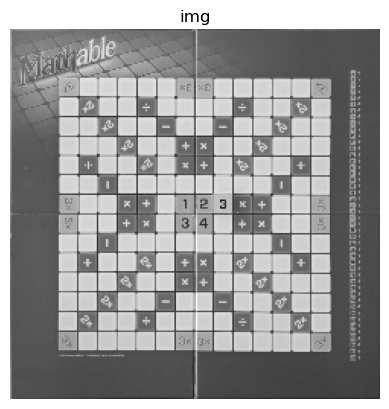

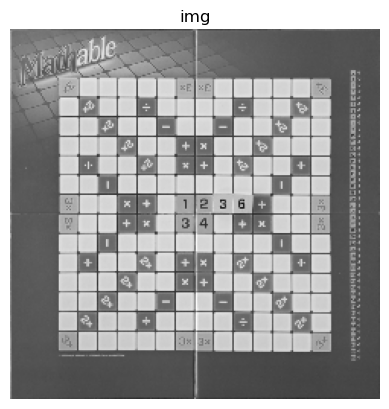

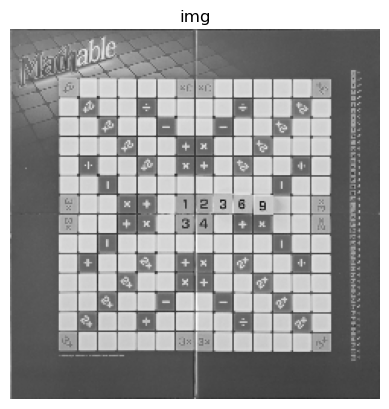

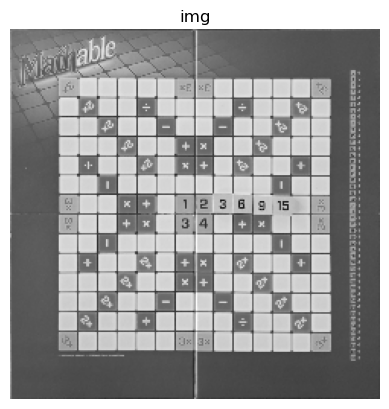

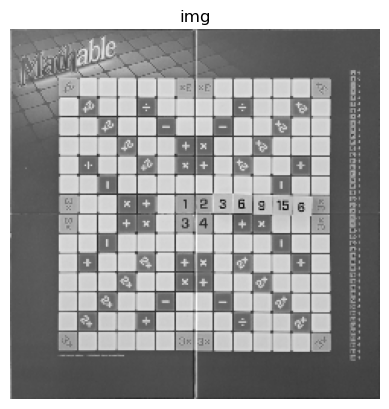

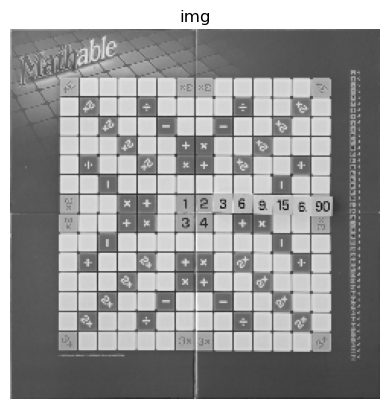

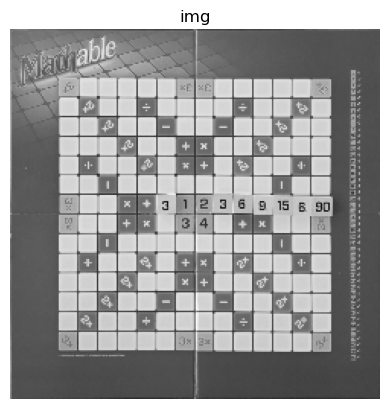

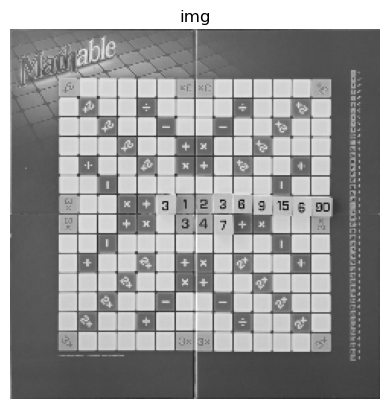

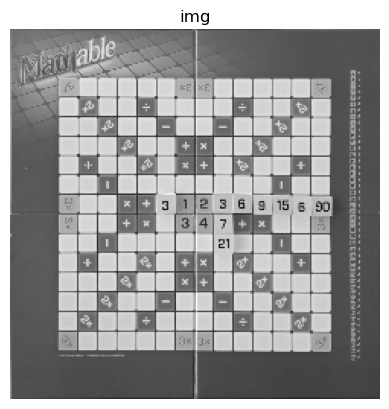

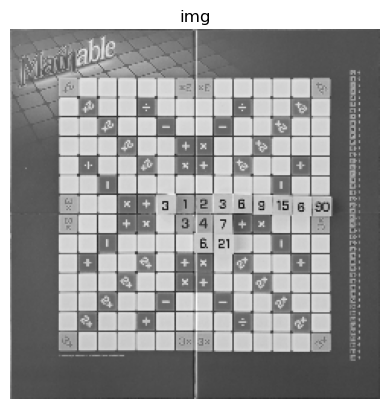

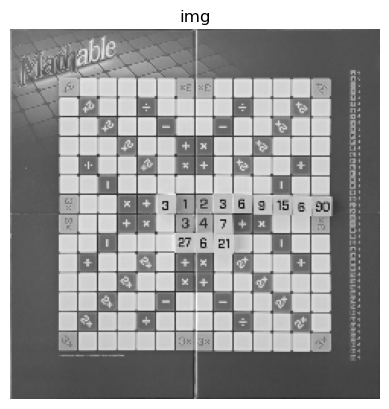

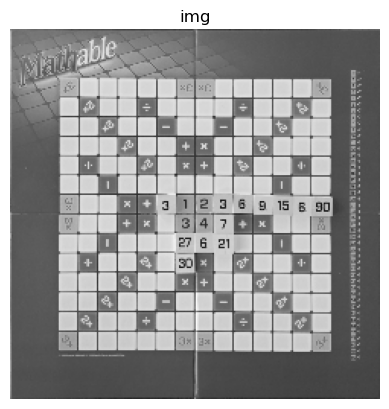

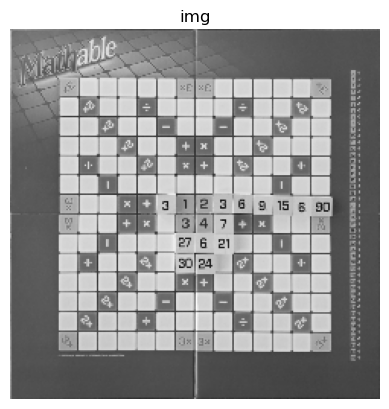

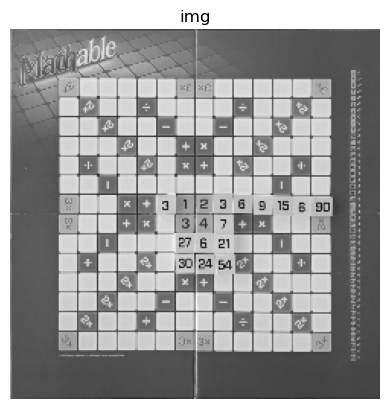

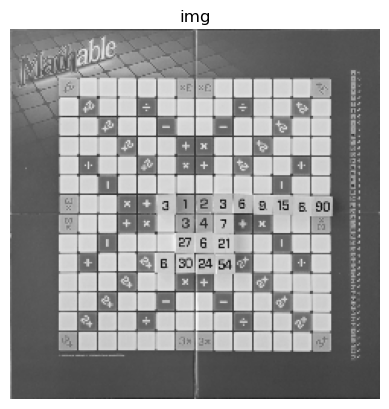

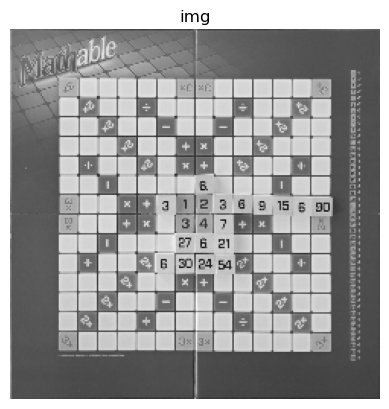

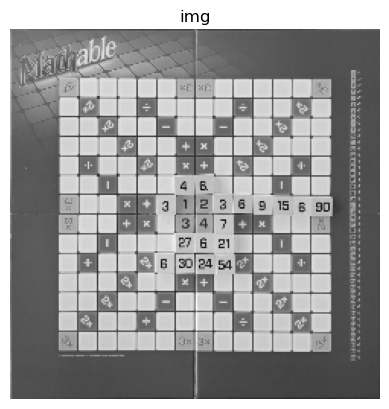

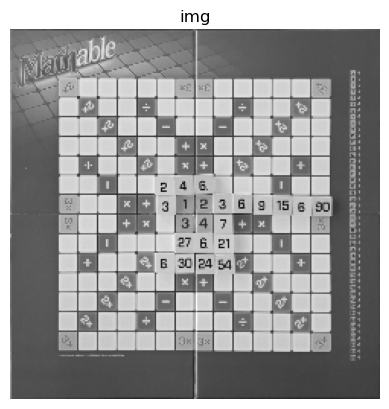

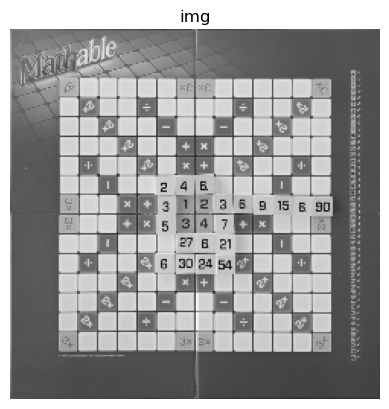

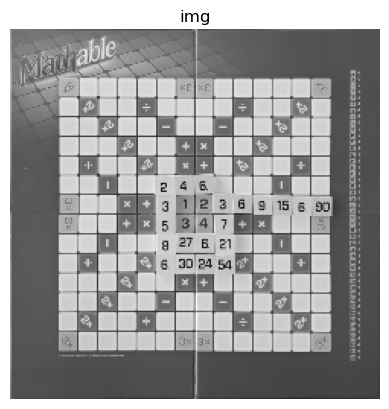

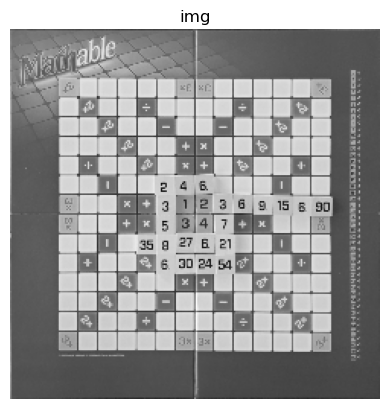

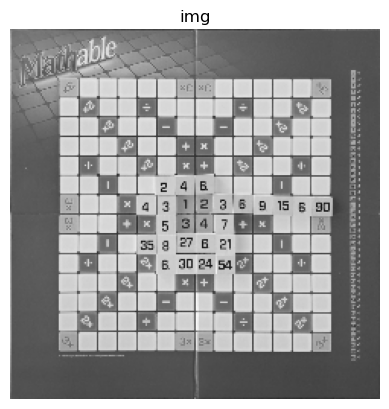

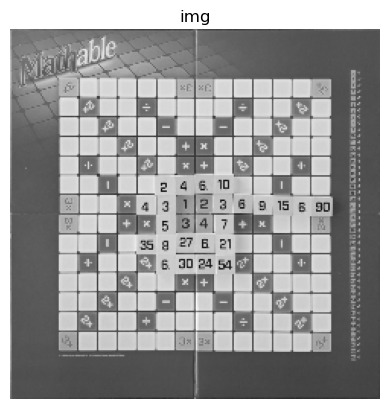

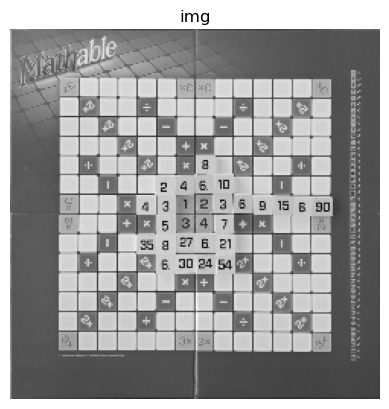

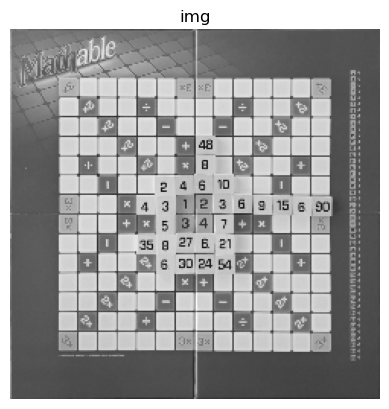

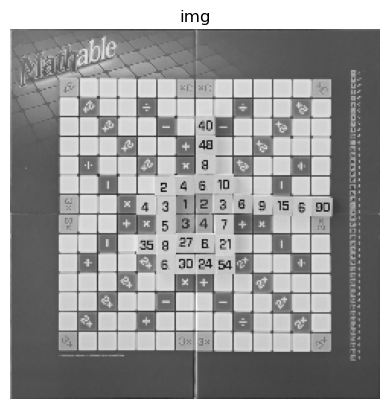

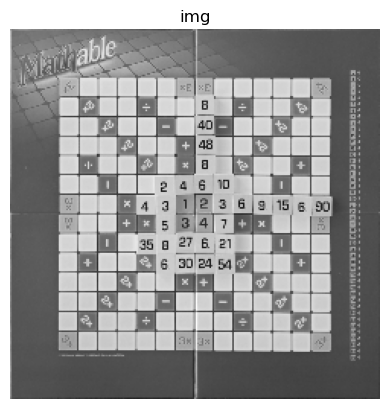

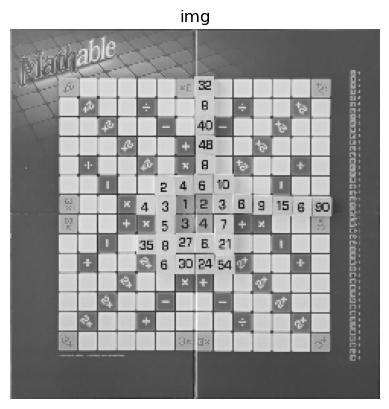

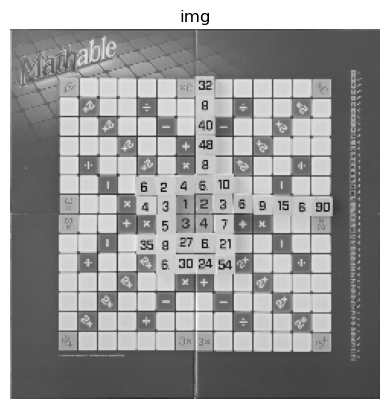

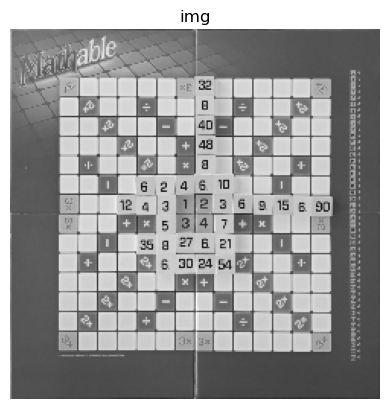

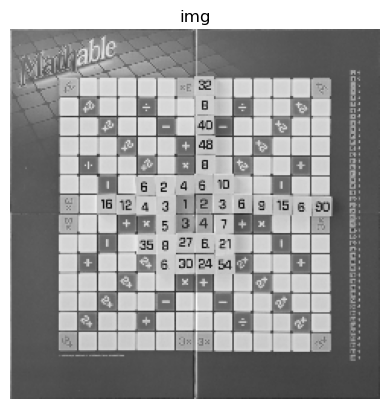

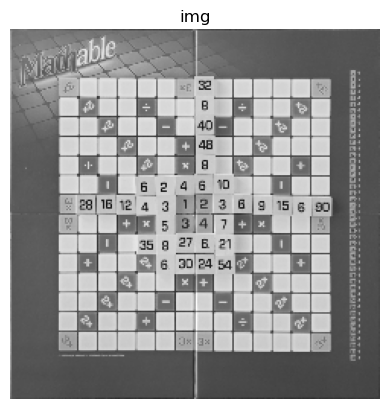

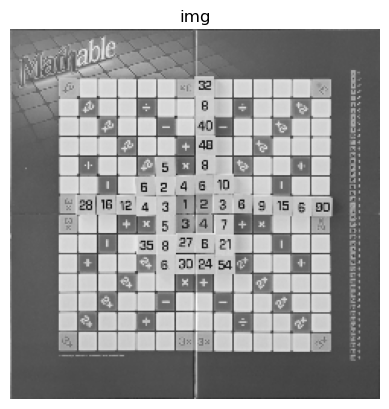

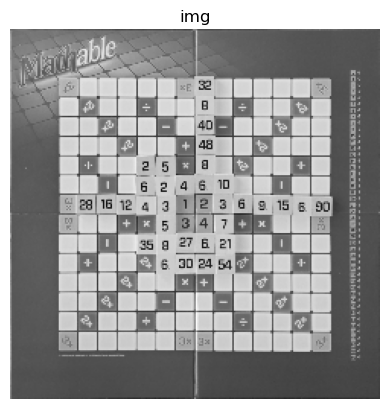

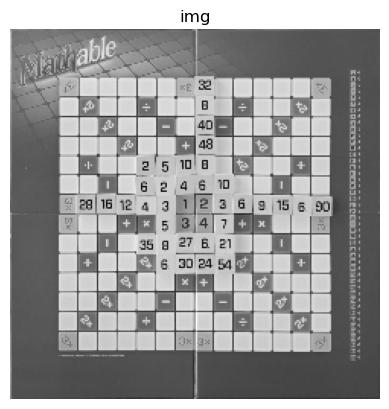

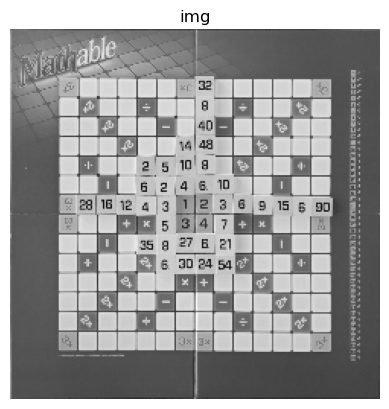

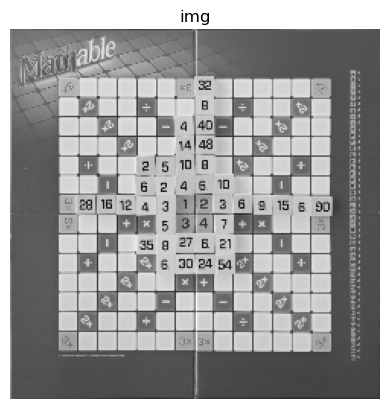

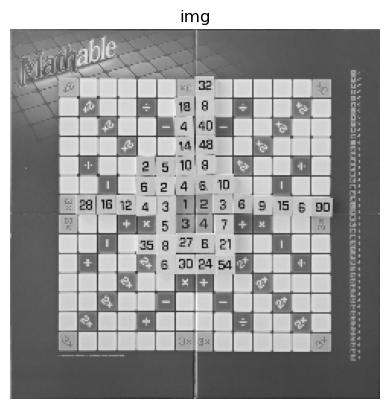

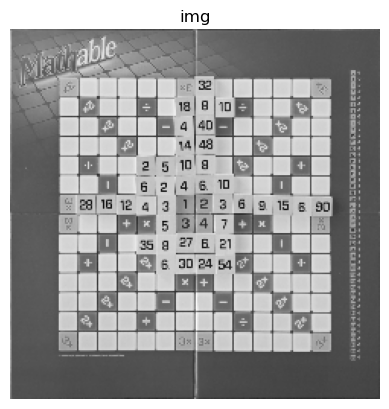

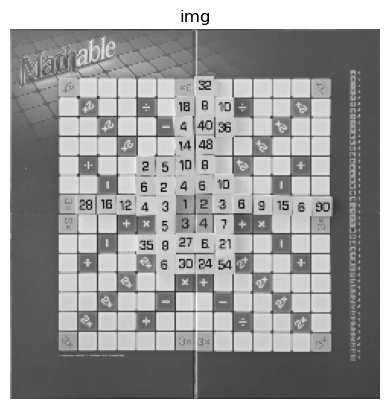

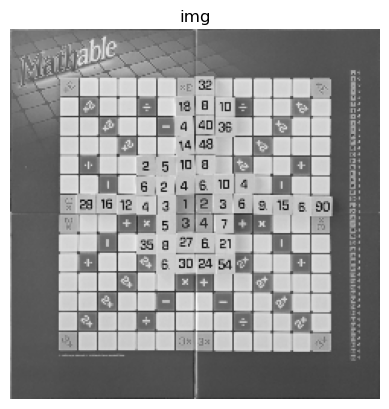

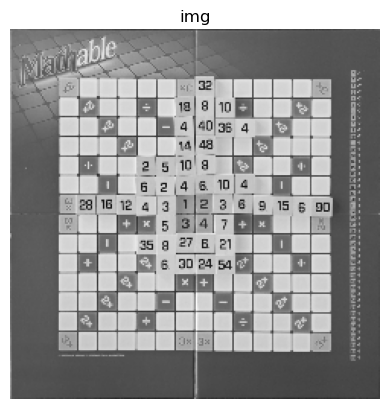

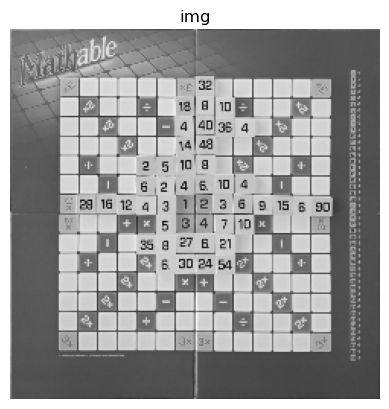

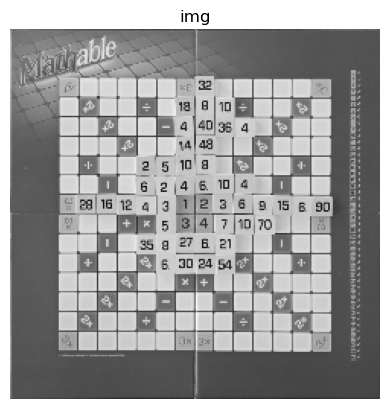

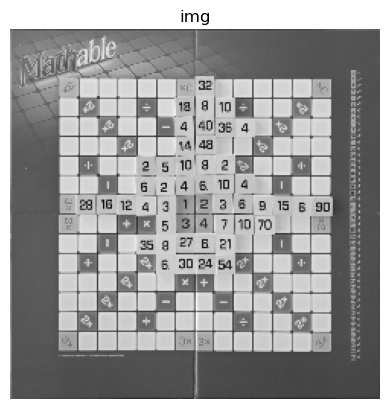

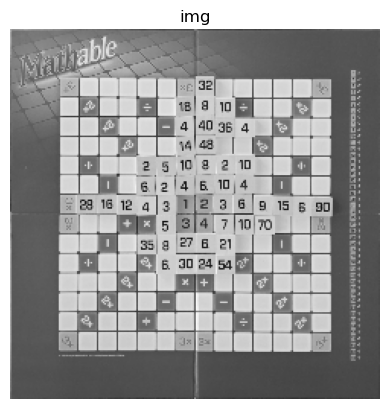

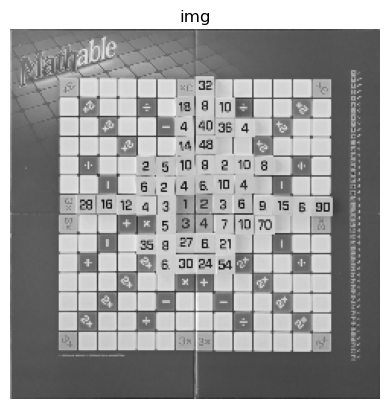

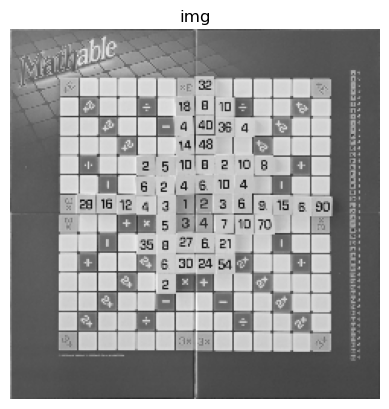

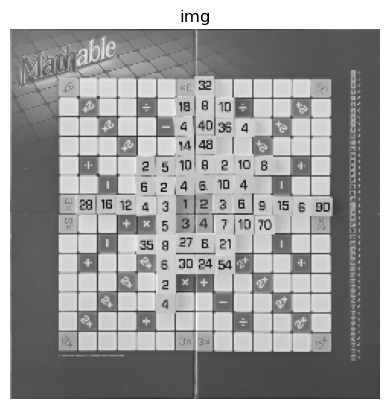

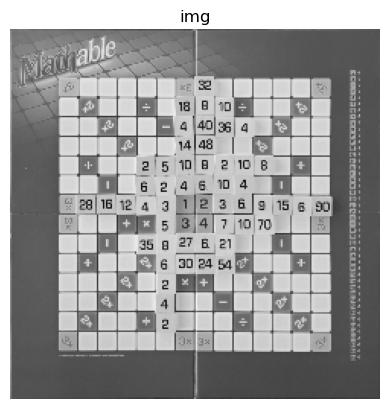

In [51]:

for image in images:
    show_image_matplot("img",image)